# Maclaurin and Taylor Series

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 7 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand the concepts behind Maclaurin and Taylor series approximations
- Use Maclaurin and Taylor expansions for exp, log, sin, cos, and other functions

## Series

Last time, we saw that infinite series can be useful for chemistry and physics. Many times, we can either use a ***series limit*** for mathematical purposes. We can also use finite approximations from ***partial sums*** to estimate a more difficult or complex system.

In particular, we used a ***power series*** to approximate $e^x$ and saw that related power series could be derived for other functions.

We will now use two new kinds of series to approximate functions.

<div class="alert alert-block alert-success">

Mathematical functions that are continuous and infinitely differentiable may be  represented in terms of the function’s derivatives at a single point.
    
The ***Maclaurin series*** represents a function as power series in x with coefficients depending on the derivatives of the function at x = 0. 

The ***Taylor series*** represents a function in terms of derivatives of the function at an arbitrary point x0 and powers of the displacement x - x0.
    
</div>

We'll start with the Maclaurin series, since the derivations are a bit "cleaner."

## Maclaurin Series

While we saw a few functions evaluated as power series, we would like to know how to express *any* function as a power series...

$$
f(x)=\sum_{n=0}^{\infty} a_{n} x^{n}=a_{0}+a_{1} x+a_{2} x^{2}+\ldots
$$

The key question, of course is how to calculate the coefficients $a_0$, $a_1$, etc.

Since we will perform this approximation near $x = 0$ we can easily get the first coefficient $a_0$:

$$
f(0) = a_0 + a_1\cdot 0 + a_2\cdot 0 + \ldots
$$

We can get the *next* coefficient with the first derivative:

$$
f'(0) = a_1 + 2 a_2 \cdot 0 + \ldots
$$

Not surprisingly, we can continue this with second derivatives, third derivatives, etc.

$$
\left.\frac{d^{2}}{d x^{2}} f(x)\right|_{x=0}=2 a_{2}
$$

$$
\left.\frac{d^{3}}{d x^{3}} f(x)\right|_{x=0}=2 \cdot 3 a_{3}
$$

So in general, the coefficients will all be:

$$
a_{n}=\left.\frac{1}{n !} \frac{d^{n}}{d x^{n}} f(x)\right|_{x=0}
$$

This may seem like a boring and tedious procedure. On the other hand, it means that we can express *any* function as a power series around $x = 0$, which can be very useful.

We will see throughout the course that there are several methods to approximate any function (even something amazingly complex) as an infinite series of simple "basis" functions.

In [1]:
# Let's do some examples
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sympy import init_session
init_session()

IPython console for SymPy 1.11.1 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



We already know the power series for $e^x$ - we saw it last class:

$$
e^{x}=\sum_{n=0}^{\infty} \frac{1}{n !} x^{n}=1+x+\frac{1}{2 !} x^{2}+\frac{1}{3 !} x^{3}+\ldots
$$

Let's see how the Maclauren series works and if we can derive this power series for $e^x$. Remember that what we need are the $a_n$:

In [2]:
f = exp(x)
print('a0, ', f.subs(x, 0))
print('a1, ', 1*diff(f, x).subs(x, 0))
print('a2, ', 1/2*diff(f, x, 2).subs(x, 0))

a0,  1
a1,  1
a2,  0.500000000000000


This is obviously boring, because the derivative of $e^x$ is *always* $e^x$ and at $x=0$ the number is *always* one.

$$
a_{n}=\left.\frac{1}{n !} \frac{d^{n}}{d x^{n}} f(x)\right|_{x=0}=\frac{1}{n !} \times 1
$$

Thus, it's not a surprise that the Maclaurin series for $e^x$ is:

$$
e^{x}=\sum_{n=0}^{\infty} \frac{1}{n !} x^{n}=1+x+\frac{1}{2 !} x^{2}+\frac{1}{3 !} x^{3}+\ldots
$$

Let's do a more interesting example for $\sin x$:

In [3]:
f = sin(x)

print('a0, ', f.subs(x, 0))
print('a1, ', 1/factorial(1)*diff(f, x).subs(x, 0))
print('a2, ', 1/factorial(2)*diff(f, x, 2).subs(x, 0))
print('a3, ', 1/factorial(3)*diff(f, x, 3).subs(x, 0))

a0,  0
a1,  1
a2,  0
a3,  -1/6


Let's think about what this means.

- constant: $\sin 0 = 0$
- first derivative: $d/dx = \cos x$ and of course $\cos 0 = 1$
- second derivative: $d^2/dx^2 = -\sin x$ so 0 again.
- third derivative: $d^3/dx^3 = -\cos x$ so $a_3 = \frac{1}{3!} \times -1 = \frac{-1}{6}$

Okay, I obviously could keep going by hand, but larger terms clearly call for a loop:

In [4]:
# or more fun...
for n in range(6):
    print(n, 1/factorial(n)*diff(f, x, n).subs(x, 0))

0 0
1 1
2 0
3 -1/6
4 0
5 1/120


Notice that for even orders, the resulting derivative will be $\sin x$ and thus the coefficient is zero.

I want to plot these...

In [6]:
# Let's plot it!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#plt.style.use('./chem1000.mplstyle')

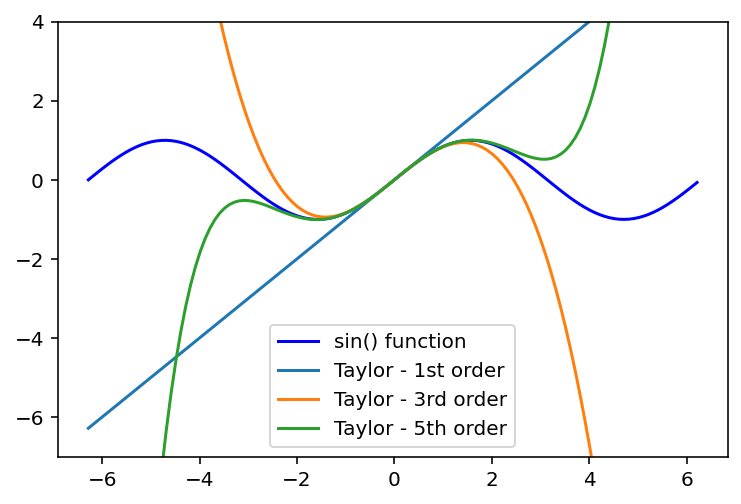

In [7]:
x = np.arange(-2*np.pi,2*np.pi,0.1)

plt.plot(x, np.sin(x), color='blue', label='sin() function')
# zero order is zero b/c sin(0) = 0
plt.plot(x, 1/factorial(1) * x, label='Taylor - 1st order')
# second order is the same b/c sin(0) = 0
plt.plot(x, 1/factorial(1) * x - 1/factorial(3)*x**3, label='Taylor - 3rd order')
# fourth order is the same again
plt.plot(x, 1/factorial(1) * x - 1/factorial(3)*x**3 + 1/factorial(5)*x**5, label='Taylor - 5th order')

plt.ylim([-7,4])
plt.legend()
plt.show()

Notice that as we add higher terms, we get an increasing accuracy of the Taylor series expansion for $\sin x$.

Of course, Sympy can do this too...

In [8]:
x = symbols('x')
f = sin(x)

# Sympy already knows how to do a Maclaurin or Taylor expension of a function
#  around x0 up to (but not including) order 'n'
# expression.series(x, x0, n)
# if x0 is omitted, it's assumed to be around x0 = 0 (Maclaurin series)
# if n is omitted, it's assumed to be n=6
f.series(x, x0 = 0, n=6)

# the "O(x**4)" expression means that terms above x**4 are omitted

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        

In [9]:
x = symbols('x')
g = cos(x)
g.series(x, x0 = 0, n=4)

     2        
    x     ⎛ 4⎞
1 - ── + O⎝x ⎠
    2         

## Quick Approximations

The Maclaurin series is useful for some quick / easy approximations for functions near $x=0$:

- $e^x \approx 1+x+\frac{x^2}{2}$ - or even just $1 + x$
- $\sin x \approx x$
- $\cos x \approx 1 - \frac{x^2}{2}$

Obviously, these aren't very good outside some region of convergence, but when doing mental math, they're useful shortcuts.

## Taylor Series

The Maclaurin series derivation is only for $x = 0$, but what if we want to expand around a different point (e.g., an optimum bond length isn't going to be 0.0 Å...

It's not hard to imagine what we need to do:
- Write the power series with ($x - x_0$)
- Evaluate the derivatives at $x_0$ instead of zero.

That's about it. The math notation looks a bit messy, but:

$$
f(x)=\sum_{n=0}^{\infty} a_{n}\left(x-x_{0}\right)^{n}=a_{0}+a_{1}\left(x-x_{0}\right)+a_{2}\left(x-x_{0}\right)^{2}+\ldots
$$

### Example log(1)

We can't take the natural log of zero. So let's consider:

$$
f(x) = \ln x
$$

around $x_0 = 1$. Well, that's going to be:

$$
\ln (x)=\ln (1)+\left.\frac{d}{d x} \ln (x)\right|_{x=1}(x-1)+\left.\frac{1}{2 !} \frac{d^{2}}{d x^{2}} \ln (x)\right|_{x=1}(x-1)^{2}+\ldots
$$

Remember that the derivative of $\ln x = 1/x$:

- $\ln 1 = 0$
- $1/x = 1$
- $-1/x^2 = -1$
- $2/x^3 = 2$
- (etc.)

So the formula looks something like:
$$
\ln \approx 0+\left.\frac{1}{x}\right|_{x=1}(x-1)+\frac{1}{2 !}\left[\frac{-1}{x^{2}}\right]_{x=1}(x-1)^{2}+\frac{1}{3 !}\left[\frac{2}{x^{3}}\right]_{x=1}(x-1)^{3}+\ldots
$$

Then doing a little clean-up:
$$
\begin{aligned}
\ln (x) &=(x-1)-\frac{1}{2 !}(x-1)^{2}+\frac{2}{3 !}(x-1)^{3}-\frac{2 \cdot 3}{4 !}(x-1)^{4}+\ldots \\
&=(x-1)-\frac{1}{2}(x-1)^{2}+\frac{1}{3}(x-1)^{3}-\frac{1}{4}(x-1)^{4}+\ldots
\end{aligned}
$$

Putting it slightly differently for small deviations $x$:

$$
\ln (1+x)=x-\frac{1}{2} x^{2}+\frac{1}{3} x^{3}-\frac{1}{4} x^{4}+\cdots=\sum_{n=1}^{\infty}(-1)^{n+1} \frac{1}{n} x^{n}
$$

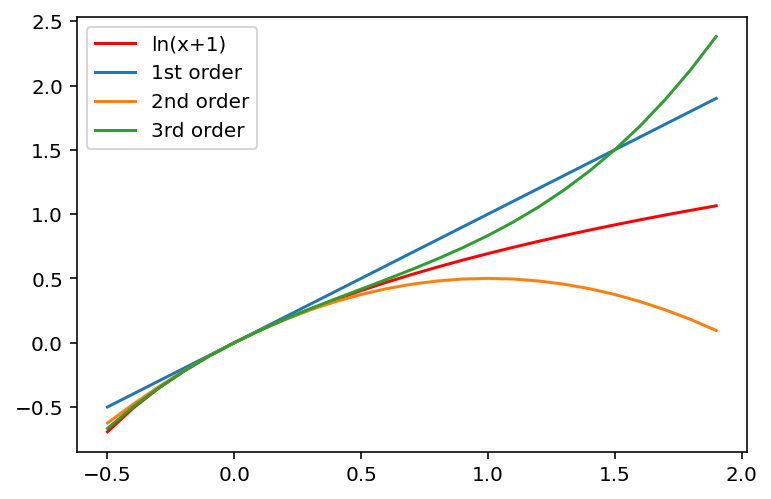

In [10]:
# plot it!
x = np.arange(-0.5,2,0.1)

plt.plot(x, np.log(x+1), color='red', label='ln(x+1)')
plt.plot(x, x, label='1st order')
plt.plot(x, x - x**2/2, label='2nd order')
plt.plot(x, x - x**2/2 + x**3/3, label='3rd order')
plt.legend()
plt.show()

We previously talked about the Morse potential energy function:

$$
V(r)=\varepsilon\left[1-e^{-\beta\left(r-r_{0}\right)}\right]^{2}=\varepsilon\left[1-2 e^{-\beta\left(r-r_{0}\right)}+e^{-2 \beta\left(r-r_{0}\right)}\right]
$$

In [11]:
x, x0, epsilon, beta = symbols('x x0 epsilon beta')
V = epsilon * (1 - exp(-beta * (x-x0)))**2

# harmonic approximation (i.e., terms in 0, 1, 2)
V.series(x, x0, n=3)

 2           2    ⎛        3        ⎞
β ⋅ε⋅(x - x₀)  + O⎝(x - x₀) ; x → x₀⎠

Notice that the simplest approximation of the potential energy is a harmonic expression (e.g., like a spring):

$$
V(r) \approx k(r - r_0)^2
$$

Near the optimal bond length, $r_0$ this looks fairly good. The problems come with higher energy, if the bond is greatly stretched or compressed.

At 298K, thermal energy is ≈0.025 eV = 0.592 kcal/mol, while we can see *anharmonic* parts of the curve (e.g., stretching at longer bond lengths) this is usually not a large effect.

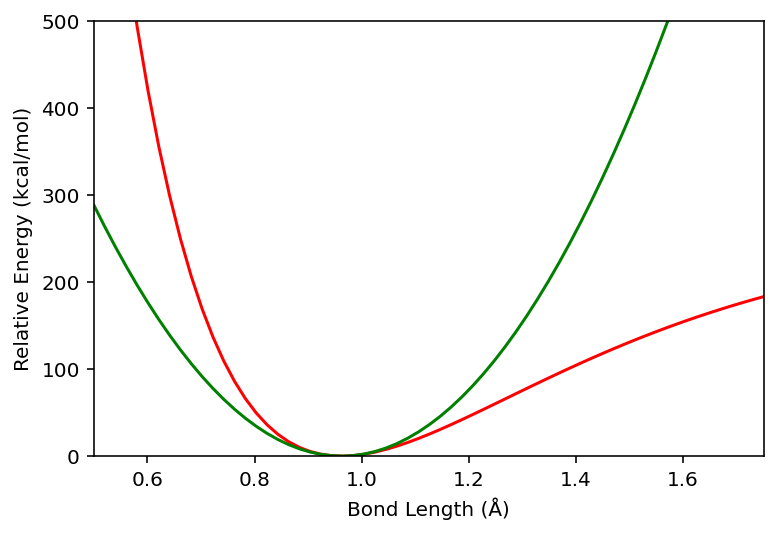

In [12]:
# let's plot it!
x = np.linspace(0.5, 2.5, 100)
beta = 2.253
epsilon = 265.79
x0 = 0.9624 # Angstroms

plt.plot(x, epsilon * (1 - np.exp(-beta * (x-x0)))**2, color='red')
plt.plot(x, beta**2*epsilon*(x - x0)**2, color='green')

plt.xlabel('Bond Length (Å)')
plt.ylabel('Relative Energy (kcal/mol)')
plt.ylim(0, 500)
plt.xlim(0.5, 1.75)
plt.show()

We can go to a higher-order Taylor series expansion to gain accuracy across a larger region. Here's the expansion up to 4th order. (Remember that Python counts from 0, so this goes up to n-1 terms, and n=5 is the O() error term.)

In [13]:
x, x0 = symbols('x x0')
V.series(x, x0, n=5)

                                     4           4                       
 2           2    3           3   7⋅β ⋅ε⋅(x - x₀)     ⎛        5        ⎞
β ⋅ε⋅(x - x₀)  - β ⋅ε⋅(x - x₀)  + ──────────────── + O⎝(x - x₀) ; x → x₀⎠
                                         12                              

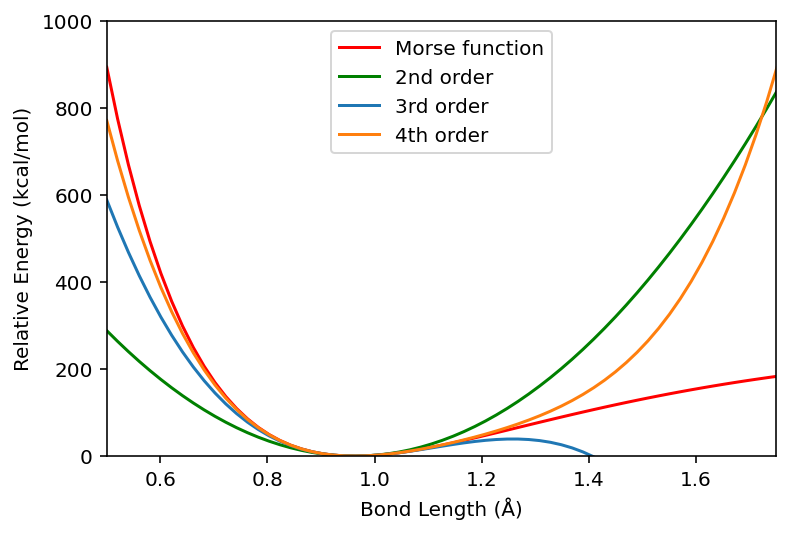

In [14]:
# let's plot the expansion terms
x = np.linspace(0.5, 2.5, 100)
beta = 2.253
epsilon = 265.79
x0 = 0.9624 # Angstroms

plt.plot(x, epsilon * (1 - np.exp(-beta * (x-x0)))**2, color='red', label='Morse function')
plt.plot(x, beta**2*epsilon*(x - x0)**2, color='green', label='2nd order')
plt.plot(x, beta**2*epsilon*(x - x0)**2 - beta**3*epsilon*(x-x0)**3, label='3rd order')
plt.plot(x, beta**2*epsilon*(x - x0)**2 
         - beta**3*epsilon*(x-x0)**3 
         + 7/12*beta**4*epsilon*(x-x0)**4, label='4th order')

plt.xlabel('Bond Length (Å)')
plt.ylabel('Relative Energy (kcal/mol)')
plt.ylim(0, 1000)
plt.xlim(0.5, 1.75)
plt.legend()
plt.show()

While the 3rd order term goes negative at large separation (uh oh!), the 4th order term looks pretty successful from ~0.6-1.3 Å. We can continue to expand the Taylor series if we wish to have higher accuracy. Notice that the odd orders have negative sign, so we'll need to be careful to pick even orders to avoid negative energies.

In [15]:
x, x0 = symbols('x x0')
V.series(x, x0, n=9)

                                     4           4    5           5       6   
 2           2    3           3   7⋅β ⋅ε⋅(x - x₀)    β ⋅ε⋅(x - x₀)    31⋅β ⋅ε⋅
β ⋅ε⋅(x - x₀)  - β ⋅ε⋅(x - x₀)  + ──────────────── - ────────────── + ────────
                                         12                4                 3

        6    7           7        8           8                       
(x - x₀)    β ⋅ε⋅(x - x₀)    127⋅β ⋅ε⋅(x - x₀)     ⎛        9        ⎞
───────── - ────────────── + ────────────────── + O⎝(x - x₀) ; x → x₀⎠
60                40               20160                              

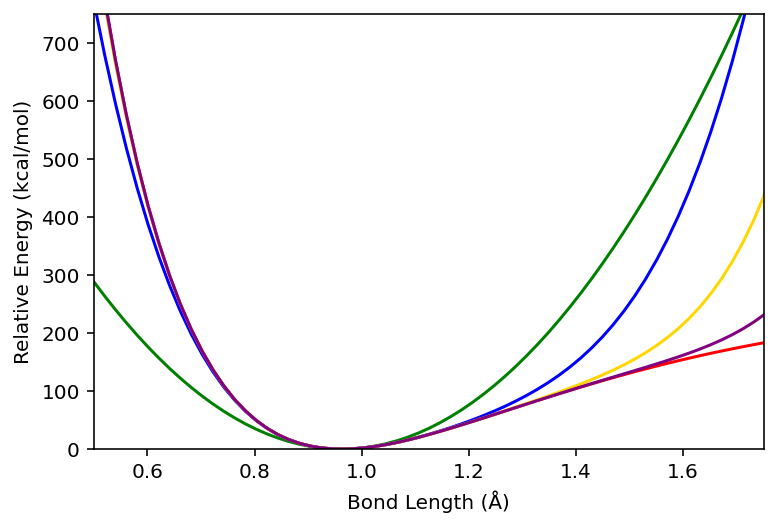

In [17]:
# let's plot the expansion terms
x = np.linspace(0.5, 2.5, 100)
beta = 2.253
epsilon = 265.79
x0 = 0.9624 # Angstroms

plt.plot(x, epsilon * (1 - np.exp(-beta * (x-x0)))**2, color='red')
plt.plot(x, beta**2*epsilon*(x - x0)**2, color='green')
plt.plot(x, beta**2*epsilon*(x - x0)**2 
         - beta**3*epsilon*(x-x0)**3 
         + 7/12*beta**4*epsilon*(x-x0)**4, color='blue')
plt.plot(x, beta**2*epsilon*(x - x0)**2 
         - beta**3*epsilon*(x-x0)**3 
         + 7/12*beta**4*epsilon*(x-x0)**4
         - 0.25*beta**5*epsilon*(x-x0)**5
         + 31/360*beta**6*epsilon*(x-x0)**6, color='gold')
plt.plot(x, beta**2*epsilon*(x - x0)**2 
         - beta**3*epsilon*(x-x0)**3 
         + 7/12*beta**4*epsilon*(x-x0)**4
         - 1/4*beta**5*epsilon*(x-x0)**5
         + 31/360*beta**6*epsilon*(x-x0)**6
         - 1/40*beta**7*epsilon*(x-x0)**7
         + 127/20160*beta**8*epsilon*(x-x0)**8, color='purple')


plt.xlabel('Bond Length (Å)')
plt.ylabel('Relative Energy (kcal/mol)')
plt.ylim(0, 750)
plt.xlim(0.5, 1.75)
plt.show()

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>